<a href="https://colab.research.google.com/github/TS-YESWANTH/DeepLearning/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
fashion_mnst = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnst.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


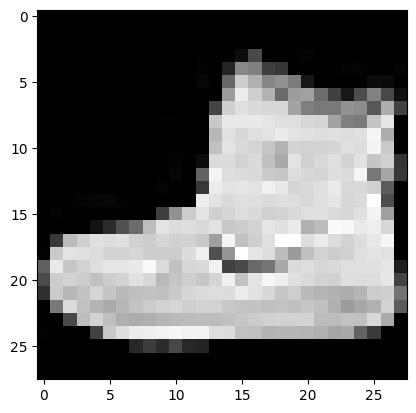

In [11]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [12]:
print(train_labels[0])

9


In [13]:
train_images, test_images = train_images/255.0, test_images/255.0

In [14]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5187 - accuracy: 0.8109 - val_loss: 0.3965 - val_accuracy: 0.8591
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3456 - accuracy: 0.8741 - val_loss: 0.3383 - val_accuracy: 0.8784
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - accuracy: 0.8906 - val_loss: 0.3131 - val_accuracy: 0.8864
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2711 - accuracy: 0.8995 - val_loss: 0.2975 - val_accuracy: 0.8939
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2517 - accuracy: 0.9067 - val_loss: 0.2782 - val_accuracy: 0.8983


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 1s - loss: 0.2782 - accuracy: 0.8983 - 1s/epoch - 3ms/step

Test Accuracy: 0.8982999920845032


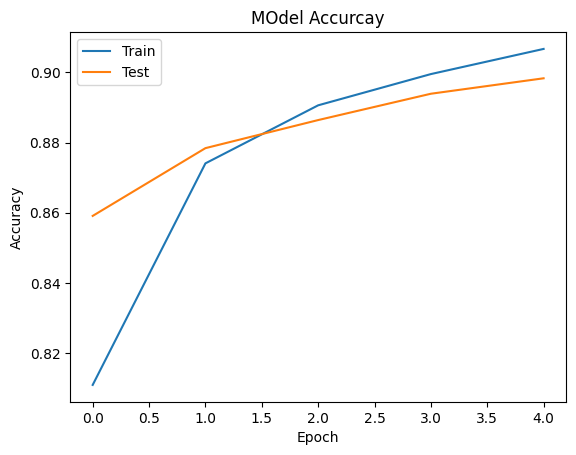

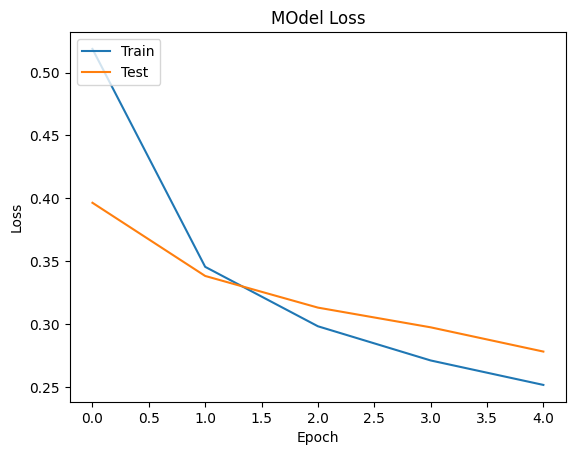

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MOdel Accurcay')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MOdel Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
model.save('fashion_MNIST.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
